In [15]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import gglngram as gn
import sqlite3 as sq

In [21]:
databasePath = 'data/database-f.sqlite'

In [22]:
dbconnection = sq.connect(databasePath)
cursor = dbconnection.cursor()

In [26]:
y, c = gn.getCountPerYear( cursor, 'faut', k=3, volume=True, normed=True )

In [27]:
cm = c.mean()
std =  c.std()
cum = np.cumsum( (c - cm) )

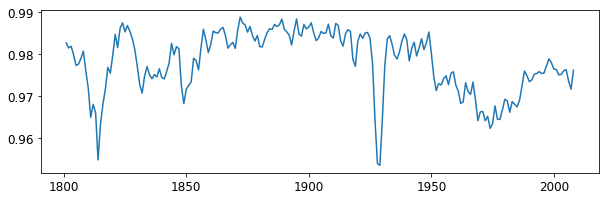

In [28]:
plt.figure( figsize=(10, 3) )
plt.plot(y, c);

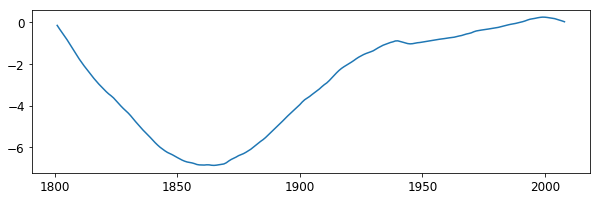

In [26]:
plt.figure( figsize=(10, 3) )
plt.plot(y, cum);

In [27]:
# point by point strangness

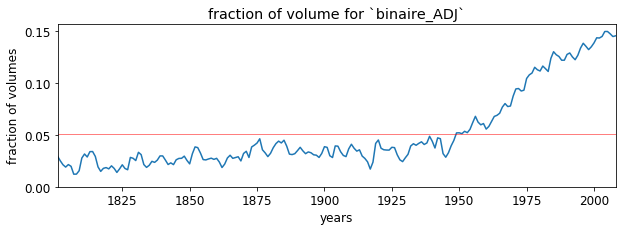

In [29]:
gn.plot( cursor, "binaire_ADJ", k=3, volume=True, normed=True )

In [191]:
y, c = gn.getCountPerYear( cursor, 'binaire_ADJ', k=3, volume=True, normed=True )
y, c = gn.getCountPerYear( cursor, 'bien', k=3, volume=True, normed=True )
#y, c = gn.getCountPerYear( cursor, 'boulevard', k=3, volume=True, normed=True )

In [192]:
n = 2  # window size

In [193]:
yStrange = y[n:]
mStrange = np.ones_like( yStrange )*.1
sdtStrange = np.ones_like( yStrange )*.1

for k in range(0, len(c)-n):
    w = c[0:k+n]
    mStrange[k] = w.mean()
    sdtStrange[k] = w.std()
    
print(k)

205


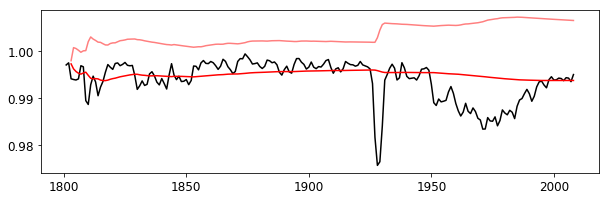

In [194]:
plt.figure( figsize=(10, 3) )
plt.plot(y, c, 'k');
plt.plot(yStrange, mStrange, 'r');
plt.plot(yStrange, mStrange+3*sdtStrange, 'r', alpha=.5);

In [195]:
A = np.vstack([y, np.ones(len(y))]).T

In [196]:
#c = sorted(c)
a, b = np.linalg.lstsq(A, c)[0]

In [197]:
lin = a*y +b

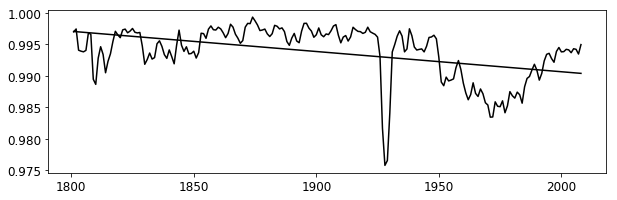

In [198]:
plt.figure( figsize=(10, 3) )
plt.plot(y, c, 'k');
plt.plot(y, lin, 'k');

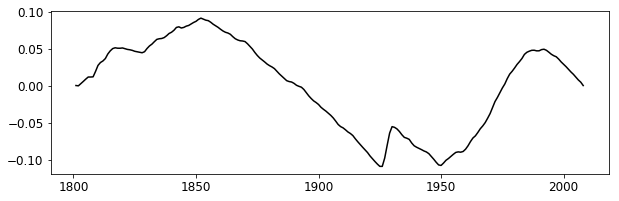

In [199]:
plt.figure( figsize=(10, 3) )
plt.plot(y, np.cumsum((lin-c)), 'k');

In [200]:
np.cumsum((lin-c))

array([  5.77213801e-05,  -3.70951408e-04,   2.54180821e-03,
         5.57693836e-03,   8.68241163e-03,   1.15247027e-02,
         1.15498859e-02,   1.17722562e-02,   1.91126878e-02,
         2.72289250e-02,   3.11477202e-02,   3.32156372e-02,
         3.64810161e-02,   4.26241294e-02,   4.69212357e-02,
         4.99851247e-02,   5.10690523e-02,   5.04926390e-02,
         5.04513672e-02,   5.08281122e-02,   4.99293108e-02,
         4.88768113e-02,   4.83786300e-02,   4.75794380e-02,
         4.63303163e-02,   4.56578190e-02,   4.50505002e-02,
         4.43421448e-02,   4.57568110e-02,   5.00406932e-02,
         5.35394364e-02,   5.59693732e-02,   5.93268555e-02,
         6.24206621e-02,   6.32808284e-02,   6.36414978e-02,
         6.48453784e-02,   6.73356388e-02,   7.03857530e-02,
         7.20607652e-02,   7.47604648e-02,   7.85803610e-02,
         7.94080450e-02,   7.78119953e-02,   7.85858882e-02,
         8.03036454e-02,   8.12579216e-02,   8.33078378e-02,
         8.52630700e-02,

In [2]:
## Min Max

In [98]:
y, c = gn.getCountPerYear( cursor, 'familial', k=3, volume=False, normed=True )

In [99]:
maxmin = c.max() - c.min()
alpha = 0.1
lowLimit = alpha*maxmin + c.min()
highLimit = c.max() - alpha*maxmin
middleLimit = maxmin*0.5 + c.min()

yMiddle = y[ np.argwhere( c>middleLimit )[0][0] ]
yearsInTheMiddle = y[ np.argwhere( (c>lowLimit) & (c<highLimit)  ) ]
dt = len( yearsInTheMiddle )
puissance = maxmin / dt

In [100]:
yMiddle = int( yearsInTheMiddle.mean() )

In [101]:
puissance

3.0446447129227256e-07

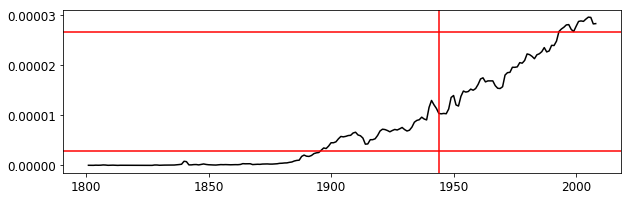

In [102]:
plt.figure( figsize=(10, 3) )
plt.plot(y, c, 'k');
plt.axhline(y=lowLimit, color='r');
plt.axhline(y=highLimit, color='r');
plt.axvline(x=yMiddle, color='r');

In [103]:
np.argwhere( c>limit )[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [95]:
p = np.diff(c)/c[1:]
p = p[ (c[1:])>1e-1 ]

In [96]:
p.sum()

2.840693695089762

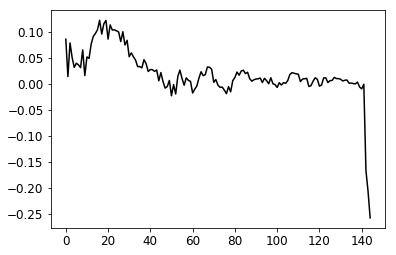

In [97]:
plt.plot( p, 'k');
